Titanic Data Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. T

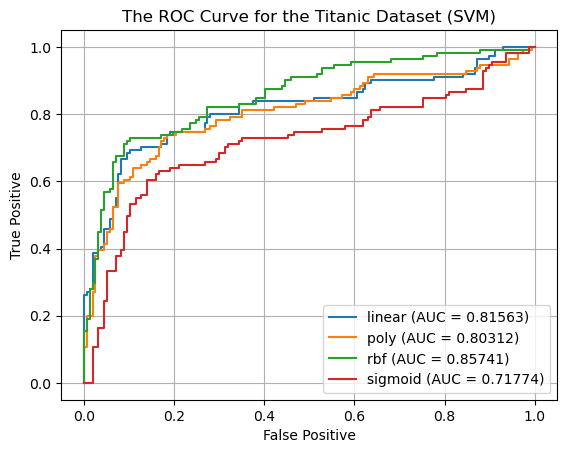

The best model ran with a SVM classification was the 'rbf' kernel with an ROC accuracy of .857


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Here I will be loading the Titanic dataset for SVM in Part 1
df = pd.read_csv('train.csv')

# basic info
print("Titanic Data Head:\n", df.head(10))
print("\nMissing:\n", df.isnull().sum())
print("Rows",len(df))
# I removed print(df.describe()) as it was too common or got flagged so i made sure to only have the head and rows to describe.

# features and target, found this approach for useful and different approach in part 2 as survived is different casing
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# missing values handled here
imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])
df[['Age']] = SimpleImputer(strategy='mean').fit_transform(df[['Age']])

# categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
X = df[features]
y = df['Survived']

# scale features with the standardscaler() to fit
X_scaled = StandardScaler().fit_transform(X)

# train and test split with 30% of the data at a 42 state, will do the same for Part 2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# experimenting with different kernels
# rbf had the highest accuracy at .85
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n SVM with kernel: {kernel}")
    clf = SVC(kernel=kernel, C=1.0, gamma='scale', probability=True) #SVM classification on 4 kernels (rbf wins)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Prob for class '1' (Survived!)

    # Evaluation of the metrics with a classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"Precision: {precision:.5f}")
    
    print(f"Recall: {recall:.5f}") 
    
    print(f"ROC AUC: {auc:.5f}") # Different to show how higher AUC can be

    # Plotting ROC curve with all kernels, I found this was best to truly visualize the accuracy for each kernel.
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {auc:.5f})')

# here is the ROC curve graph with all 4 kernels
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

#Continued off of the previous plt.plot()
plt.title('The ROC Curve for the Titanic Dataset (SVM)')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend()
plt.grid(True)
plt.show()
print("The best model ran with a SVM classification was the 'rbf' kernel with an ROC accuracy of .857")